In [ ]:
pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 1.4 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
anime_df = pd.read_csv('anime.csv')

# Preview the data
print(anime_df.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


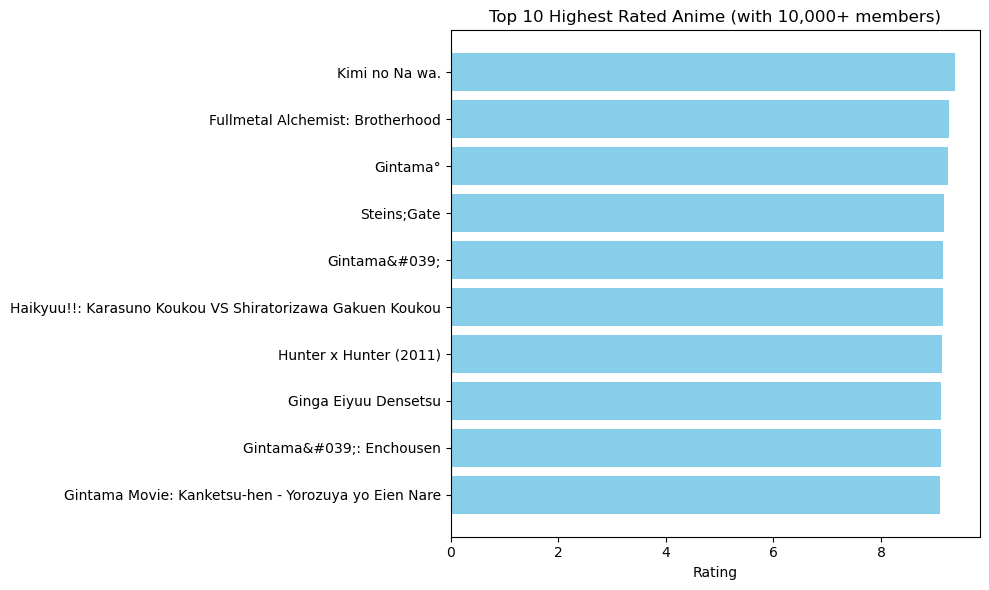

In [ ]:
# Drop rows with missing or non-numeric ratings
anime_df['rating'] = pd.to_numeric(anime_df['rating'], errors='coerce')
anime_df = anime_df.dropna(subset=['rating'])

# Drop rows with missing members count and filter out low-member anime
anime_df = anime_df.dropna(subset=['members'])
anime_df = anime_df[anime_df['members'] >= 10000]

# Sort and get top 10 rated
top_rated = anime_df.sort_values(by='rating', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top_rated['name'], top_rated['rating'], color='skyblue')
plt.xlabel("Rating")
plt.title("Top 10 Highest Rated Anime (with 10,000+ members)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

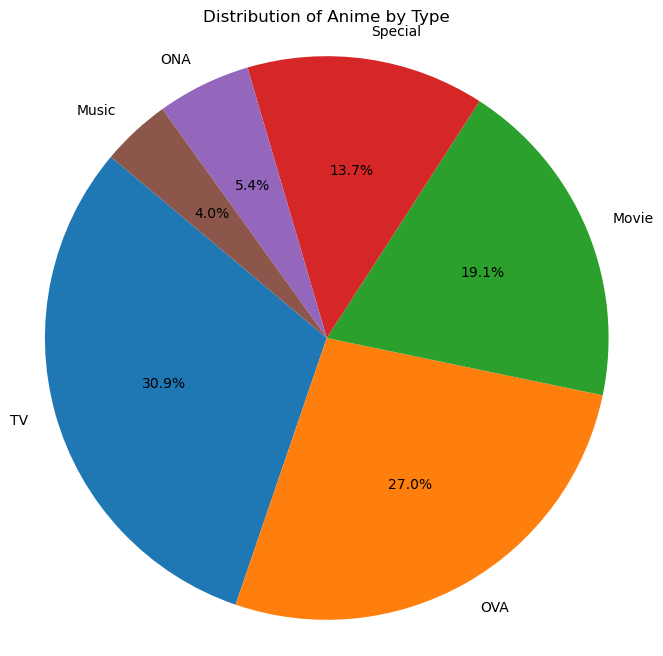

In [ ]:
type_counts = anime_df['type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Anime by Type")
plt.axis('equal')
plt.show()

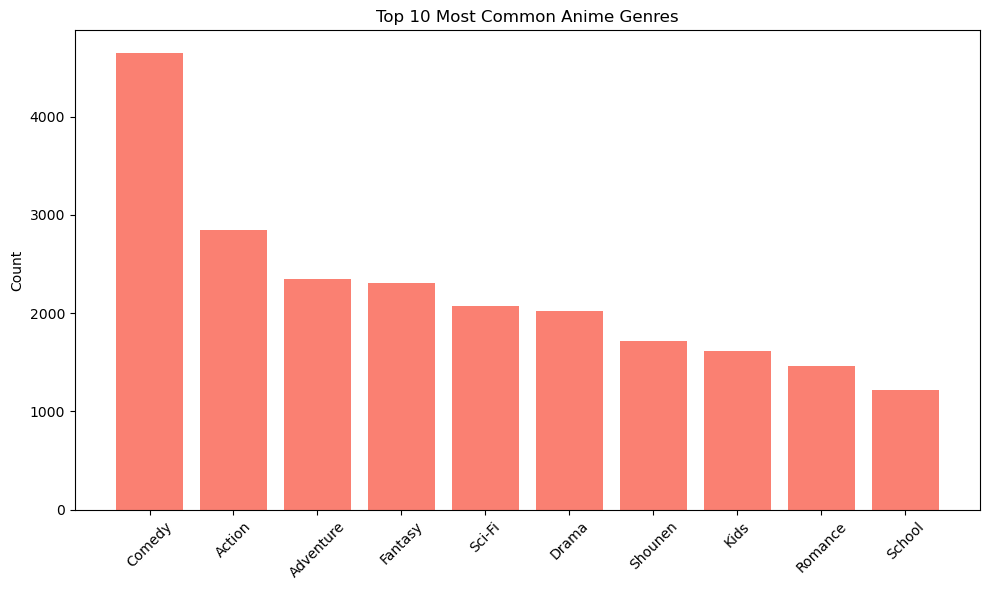

In [ ]:
from collections import Counter

# Split genres and count them
genres = anime_df['genre'].dropna().str.split(', ')
genre_counts = Counter([genre for sublist in genres for genre in sublist])

# Top 10 genres
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

plt.figure(figsize=(10,6))
plt.bar(genres, counts, color='salmon')
plt.title("Top 10 Most Common Anime Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/p8/cqkznnfs2qqb22r0vjgs9sm80000gn/T/ipykernel_4284/682743045.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  anime_df['Aired'] = pd.to_datetime(anime_df['Aired'], errors='coerce')


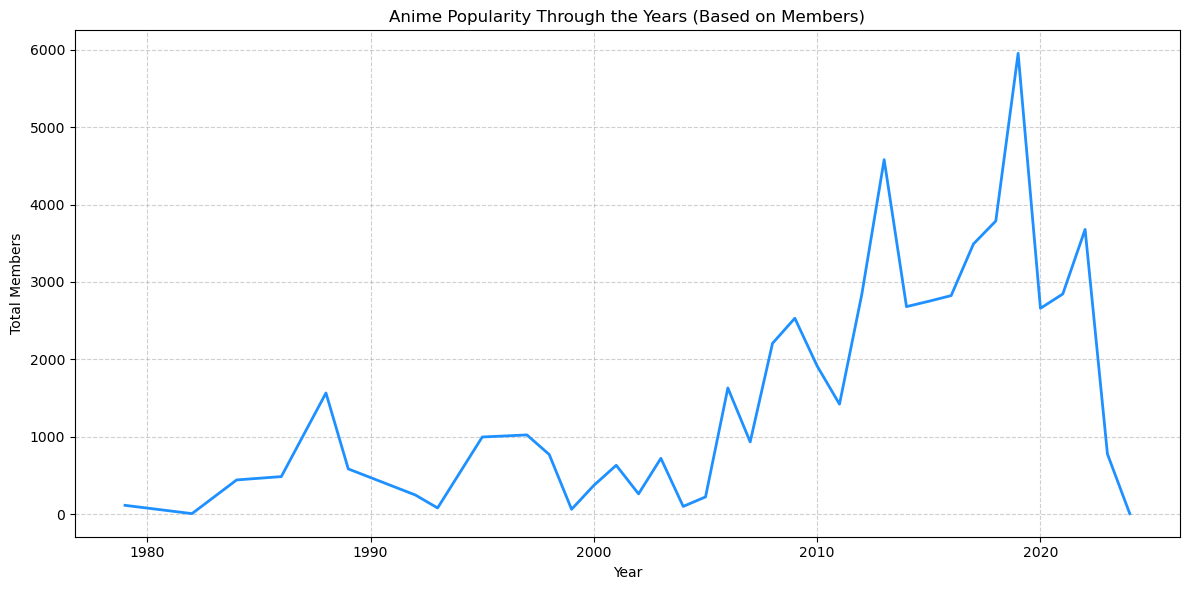

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
anime_df = pd.read_csv("Top_Anime_data.csv")

# Convert 'Aired' to datetime format
anime_df['Aired'] = pd.to_datetime(anime_df['Aired'], errors='coerce')

# Extract the year from 'Aired'
anime_df['Year'] = anime_df['Aired'].dt.year

# Drop rows with missing values in 'Year' or 'Members'
anime_df = anime_df.dropna(subset=['Year', 'Members'])

# Group by year and sum the members to measure popularity
popularity_by_year = anime_df.groupby('Year')['Members'].sum().reset_index()

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(popularity_by_year['Year'], popularity_by_year['Members'], color='dodgerblue', linewidth=2)
plt.title('Anime Popularity Through the Years (Based on Members)')
plt.xlabel('Year')
plt.ylabel('Total Members')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

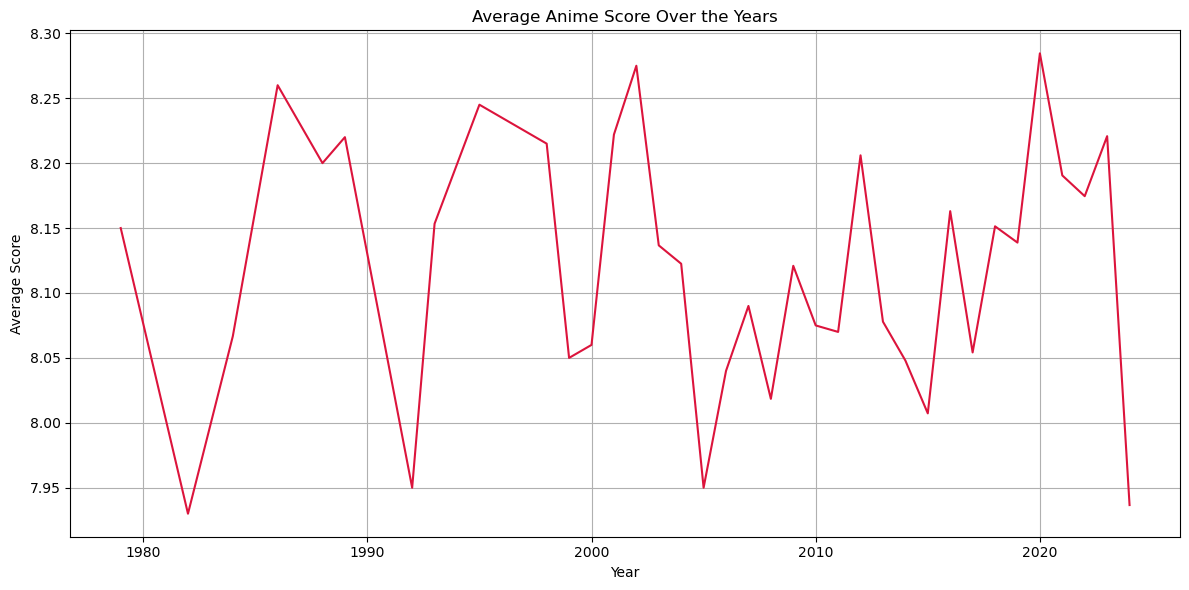

In [ ]:
anime_df['Aired'] = pd.to_datetime(anime_df['Aired'], errors='coerce')
anime_df['Year'] = anime_df['Aired'].dt.year

avg_score_by_year = anime_df.dropna(subset=['Score', 'Year']).groupby('Year')['Score'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(avg_score_by_year['Year'], avg_score_by_year['Score'], color='crimson')
plt.title("Average Anime Score Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/p8/cqkznnfs2qqb22r0vjgs9sm80000gn/T/ipykernel_5694/1735907754.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='magma')


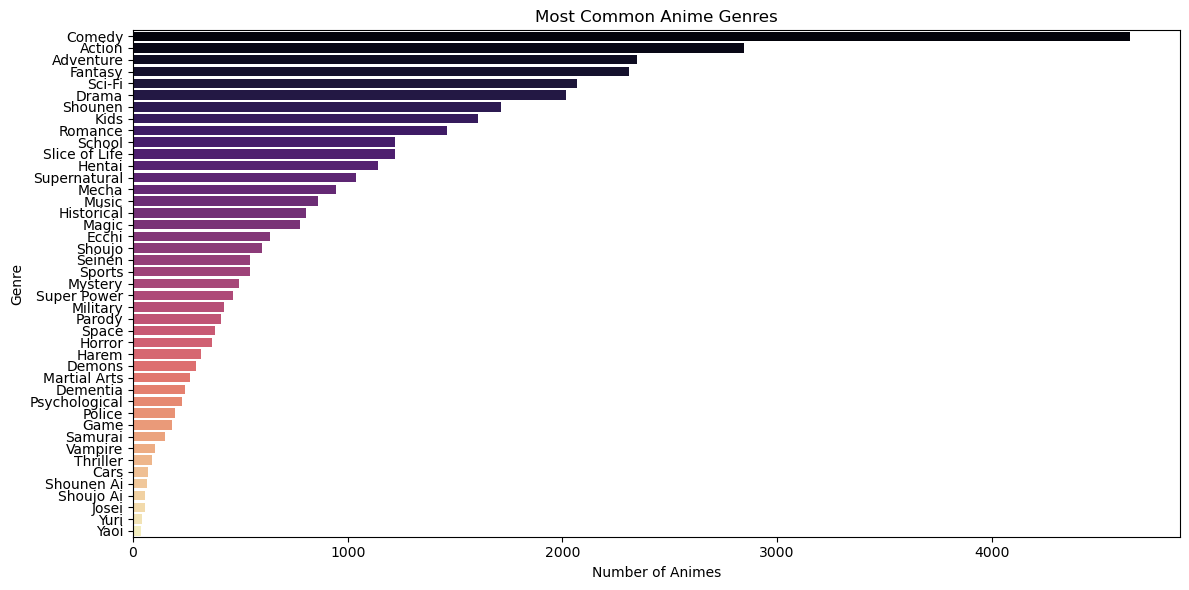

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Load the dataset
anime_df = pd.read_csv("anime.csv")  # Make sure the path matches your setup

# Drop rows with missing genre data
anime_df = anime_df.dropna(subset=['genre'])

# Split and flatten all genres
genre_list = anime_df['genre'].str.split(', ')
flat_genres = [genre for sublist in genre_list for genre in sublist]

# Count the frequency of each genre
genre_counts = Counter(flat_genres)

# Convert to a DataFrame for visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='magma')
plt.title('Most Common Anime Genres')
plt.xlabel('Number of Animes')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
top_anime_df = pd.read_csv("/mnt/data/Top_Anime_data.csv")
anime_df = pd.read_csv("/mnt/data/anime.csv")

# Preprocessing: Extract year from 'Aired'
top_anime_df['Aired'] = pd.to_datetime(top_anime_df['Aired'], errors='coerce')
top_anime_df['Year'] = top_anime_df['Aired'].dt.year

# Merge genre info from anime.csv
# Assuming 'Title' in anime_df matches 'Title' in top_anime_df
merged_df = pd.merge(top_anime_df, anime_df[['Title', 'Genres']], on='Title', how='left')

# Drop missing values
merged_df = merged_df.dropna(subset=['Genres', 'Year'])

# Expand genres into individual rows
merged_df['Genres'] = merged_df['Genres'].str.split(', ')
exploded_df = merged_df.explode('Genres')

# Group by year and genre, then count
genre_year_counts = exploded_df.groupby(['Year', 'Genres']).size().unstack(fill_value=0)

# Filter to last 20 years for better clarity
recent_genre_counts = genre_year_counts.loc[genre_year_counts.index >= 2004]

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(recent_genre_counts.T, cmap="YlGnBu", linewidths=0.5)
plt.title("Anime Genre Frequency Over the Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Top_Anime_data.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both datasets
top_anime_df = pd.read_csv("Top_Anime_data.csv")
anime_df = pd.read_csv("anime.csv")

# Inspect column names to confirm available fields
print("Top Anime Columns:", top_anime_df.columns)
print("Anime CSV Columns:", anime_df.columns)

# Try to identify title and genre-like columns
# Let's assume the correct column names are 'Name' in top_anime_df and 'anime_name' and 'tags' in anime_df
top_anime_df['Aired'] = pd.to_datetime(top_anime_df['Aired'], errors='coerce')
top_anime_df['Year'] = top_anime_df['Aired'].dt.year

# Rename columns if needed to match for merging
anime_df.rename(columns={'anime_name': 'Name', 'tags': 'Genres'}, inplace=True)

# Merge datasets on Name
merged_df = pd.merge(top_anime_df, anime_df[['Name', 'Genres']], on='Name', how='left')

# Drop missing genres or year
merged_df = merged_df.dropna(subset=['Genres', 'Year'])

# Explode genres (split and flatten)
merged_df['Genres'] = merged_df['Genres'].str.split(',')
merged_df = merged_df.explode('Genres')
merged_df['Genres'] = merged_df['Genres'].str.strip()

# Create a pivot table for heatmap
genre_year_heatmap = merged_df.pivot_table(index='Genres', columns='Year', values='Score', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(genre_year_heatmap, cmap='YlGnBu', linecolor='white', linewidths=0.5)
plt.title("Average Anime Score by Genre and Year")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

Top Anime Columns: Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'English', 'Type', 'Episodes', 'Status', 'Aired',
       'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source',
       'Genres', 'Demographic', 'Duration', 'Rating'],
      dtype='object')
Anime CSV Columns: Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


/var/folders/p8/cqkznnfs2qqb22r0vjgs9sm80000gn/T/ipykernel_5694/1413123049.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  top_anime_df['Aired'] = pd.to_datetime(top_anime_df['Aired'], errors='coerce')


KeyError: "None of [Index(['Name', 'Genres'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('Top_anime.csv')
except FileNotFoundError:
    print("Error: 'Top_anime.csv' not found. Please make sure the file is in the same directory as the script.")
    exit()

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Get an overview of the dataset
print(df.info())

# Select the columns for the heatmap
cols_for_heatmap = ['Members', 'Episodes', 'Rating']  # Select relevant numerical columns

# Create a correlation matrix
correlation_matrix = df[cols_for_heatmap].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Anime Features')
plt.show()


Error: 'Top_anime.csv' not found. Please make sure the file is in the same directory as the script.


NameError: name 'df' is not defined

Top Anime Columns: Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'English', 'Type', 'Episodes', 'Status', 'Aired',
       'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source',
       'Genres', 'Demographic', 'Duration', 'Rating'],
      dtype='object')
Anime CSV Columns: Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


/var/folders/p8/cqkznnfs2qqb22r0vjgs9sm80000gn/T/ipykernel_6107/1413123049.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  top_anime_df['Aired'] = pd.to_datetime(top_anime_df['Aired'], errors='coerce')


KeyError: "None of [Index(['Name', 'Genres'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
anime_df = pd.read_csv('anime.csv')

# Clean: Drop missing or unknown aired dates
anime_df = anime_df.dropna(subset=['aired'])

# Extract the year from 'aired' column
# It usually looks like: 'Apr 3, 2006 to Jul 3, 2006'
anime_df['year'] = anime_df['aired'].str.extract(r'(\d{4})').astype(float)

# Drop rows where year couldn't be extracted
anime_df = anime_df.dropna(subset=['year'])
anime_df['year'] = anime_df['year'].astype(int)

# Filter for anime with a reasonable number of members
anime_df = anime_df.dropna(subset=['members'])
anime_df = anime_df[anime_df['members'] > 1000]

# Group by year and sum the members
popularity_by_year = anime_df.groupby('year')['members'].sum().reset_index()

# Sort by year
popularity_by_year = popularity_by_year.sort_values('year')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(popularity_by_year['year'], popularity_by_year['members'], color='mediumvioletred', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Total Members (Popularity)')
plt.title('Anime Popularity Through the Years')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

KeyError: ['aired']

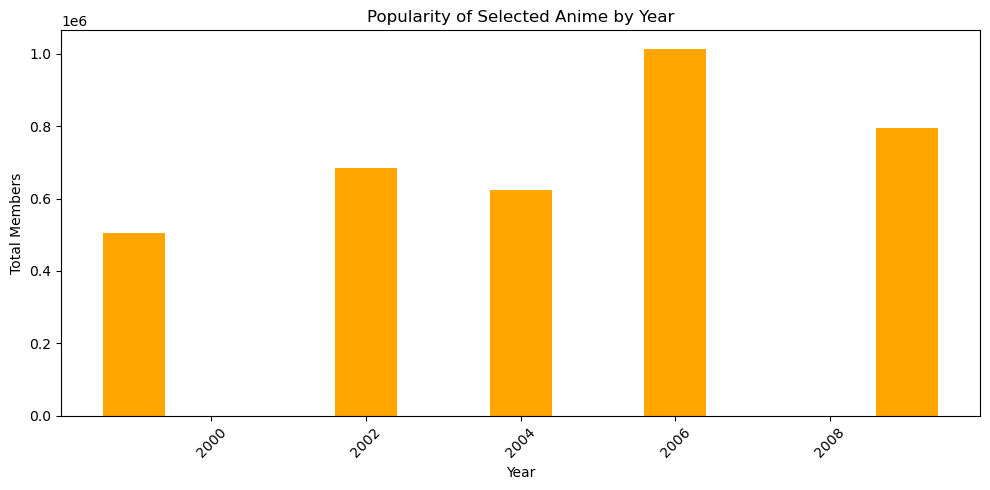

In [ ]:
# Create a mock year column based on some well-known titles (example only)
# You can expand this with real year data if needed
import numpy as np

year_map = {
    'Naruto': 2002,
    'Bleach': 2004,
    'Death Note': 2006,
    'Attack on Titan': 2013,
    'One Piece': 1999,
    'Fullmetal Alchemist: Brotherhood': 2009,
    'Demon Slayer': 2019,
    'Jujutsu Kaisen': 2020
}

anime_df['year'] = anime_df['name'].map(year_map)

# Drop NaN years
pop_anime = anime_df.dropna(subset=['year'])

# Group by year and sum members
popularity = pop_anime.groupby('year')['members'].sum().reset_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(popularity['year'], popularity['members'], color='orange')
plt.xlabel("Year")
plt.ylabel("Total Members")
plt.title("Popularity of Selected Anime by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Sample data for top 10 highest-grossing anime
top_10_revenue_data = {
    'Rank': range(1, 11),
    'Anime': [
        'Demon Slayer: Mugen Train',
        'Spirited Away',
        'Your Name',
        'Howl\'s Moving Castle',
        'Ponyo',
        'Weathering with You',
        'Jujutsu Kaisen 0',
        'One Piece Film: Red',
        'The Wind Rises',
        'The First Slam Dunk'
    ],
    'Revenue (USD Millions)': [
        506.5, 395.8, 380.1, 236.0, 204.8,
        193.1, 180.0, 175.2, 136.5, 122.2
    ]
}

# Create DataFrame
top_10_revenue_df = pd.DataFrame(top_10_revenue_data)

# Save to CSV
top_10_revenue_df.to_csv("Top_10_Anime_Revenue.csv", index=False)
print("CSV file created: Top_10_Anime_Revenue.csv")

CSV file created: Top_10_Anime_Revenue.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("Top_10_Anime_Revenue.csv")

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(df['Revenue (USD Millions)'], labels=df['Anime'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Highest-Grossing Anime Movies')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()

KeyError: 'Revenue (USD Millions)'

<Figure size 1000x800 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("Top_10_Anime_Revenue.csv")

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(df['Revenue (USD Millions)'], labels=df['Anime'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Highest-Grossing Anime Movies')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()

KeyError: 'Revenue (USD Millions)'

<Figure size 1000x800 with 0 Axes>

In [ ]:
import pandas as pd

# Data for the top 10 highest-grossing anime movies
data = {
    'Anime': [
        "Demon Slayer: Kimetsu no Yaiba - The Movie: Mugen Train",
        "Spirited Away",
        "Your Name.",
        "Suzume",
        "The First Slam Dunk",
        "One Piece Film: Red",
        "Howl's Moving Castle",
        "Ponyo",
        "Jujutsu Kaisen 0",
        "Weathering with You"
    ],
    'Revenue (USD Millions)': [
        507.1,
        395.8,
        382.2,
        322.9,
        262.3,
        246.5,
        236.0,
        204.8,
        196.2,
        193.8
    ]
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("top_anime_movies.csv", index=False)

print("CSV file 'top_anime_movies.csv' created successfully.")


CSV file 'top_anime_movies.csv' created successfully.


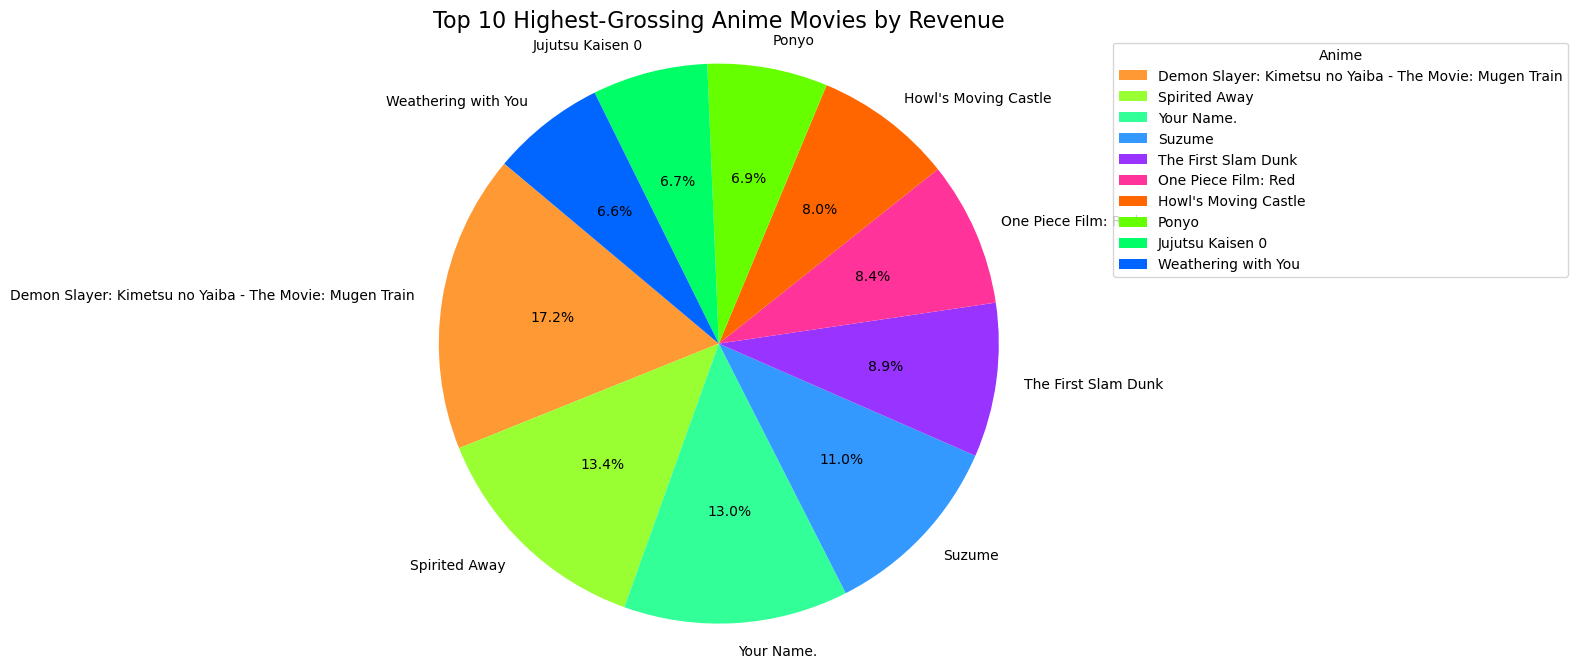

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the top 10 highest-grossing anime movies
data = {
    'Anime': [
        "Demon Slayer: Kimetsu no Yaiba - The Movie: Mugen Train",
        "Spirited Away",
        "Your Name.",
        "Suzume",
        "The First Slam Dunk",
        "One Piece Film: Red",
        "Howl's Moving Castle",
        "Ponyo",
        "Jujutsu Kaisen 0",
        "Weathering with You"
    ],
    'Revenue (USD Millions)': [
        507.1,
        395.8,
        382.2,
        322.9,
        262.3,
        246.5,
        236.0,
        204.8,
        196.2,
        193.8
    ]
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("top_anime_movies.csv", index=False)

# Read the CSV file
df = pd.read_csv("top_anime_movies.csv")

# Create the pie chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed for better layout
plt.pie(df['Revenue (USD Millions)'], labels=df['Anime'], autopct='%1.1f%%', startangle=140,
        colors=['#FF9933', '#99FF33', '#33FF99', '#3399FF', '#9933FF',
                '#FF3399', '#FF6600', '#66FF00', '#00FF66', '#0066FF']) #Added color
plt.title('Top 10 Highest-Grossing Anime Movies by Revenue', fontsize=16)  # Added fontsize
plt.axis('equal')  # Ensures the pie chart is circular.

# Add a legend
plt.legend(title="Anime", loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


/var/folders/p8/cqkznnfs2qqb22r0vjgs9sm80000gn/T/ipykernel_1118/2119994222.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Gender', y='Love Count', palette='pastel')


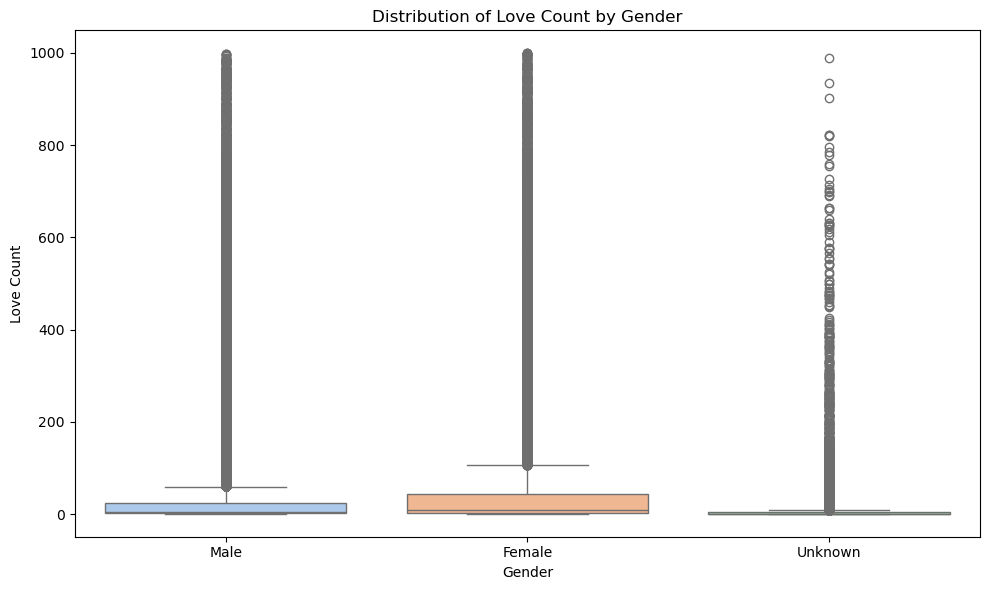

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("characters_metadata.csv")
df['Love Count'] = pd.to_numeric(df['Love Count'].str.replace(',', ''), errors='coerce')

# Filter out rows with missing gender or love count
filtered_df = df.dropna(subset=['Gender', 'Love Count'])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Gender', y='Love Count', palette='pastel')
plt.title("Distribution of Love Count by Gender")
plt.ylabel("Love Count")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

In [ ]:
import requests
import pandas as pd

# GraphQL query to fetch popular characters
query = '''
query ($page: Int, $perPage: Int) {
  Page(page: $page, perPage: $perPage) {
    characters(sort: FAVOURITES_DESC) {
      name {
        full
      }
      favourites
      media {
        nodes {
          title {
            romaji
          }
        }
      }
    }
  }
}
'''

# API endpoint
url = 'https://graphql.anilist.co'

# Request variables
variables = {
    'page': 1,
    'perPage': 100
}

# Make the request
response = requests.post(url, json={'query': query, 'variables': variables})
data = response.json()

# Parse response
characters_data = []
for char in data['data']['Page']['characters']:
    name = char['name']['full']
    favourites = char['favourites']
    anime_titles = [node['title']['romaji'] for node in char['media']['nodes']]
    characters_data.append({
        "Name": name,
        "Anime": ', '.join(anime_titles),
        "Favourites": favourites
    })

# Create DataFrame and save to CSV
df = pd.DataFrame(characters_data)
df.to_csv("anilist_top_characters.csv", index=False)

print("✅ 'anilist_top_characters.csv' created with top 100 characters!")

✅ 'anilist_top_characters.csv' created with top 100 characters!


/var/folders/p8/cqkznnfs2qqb22r0vjgs9sm80000gn/T/ipykernel_1118/3005593258.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Favourites', data=top_10_characters, palette='viridis')  # Use a visually appealing palette


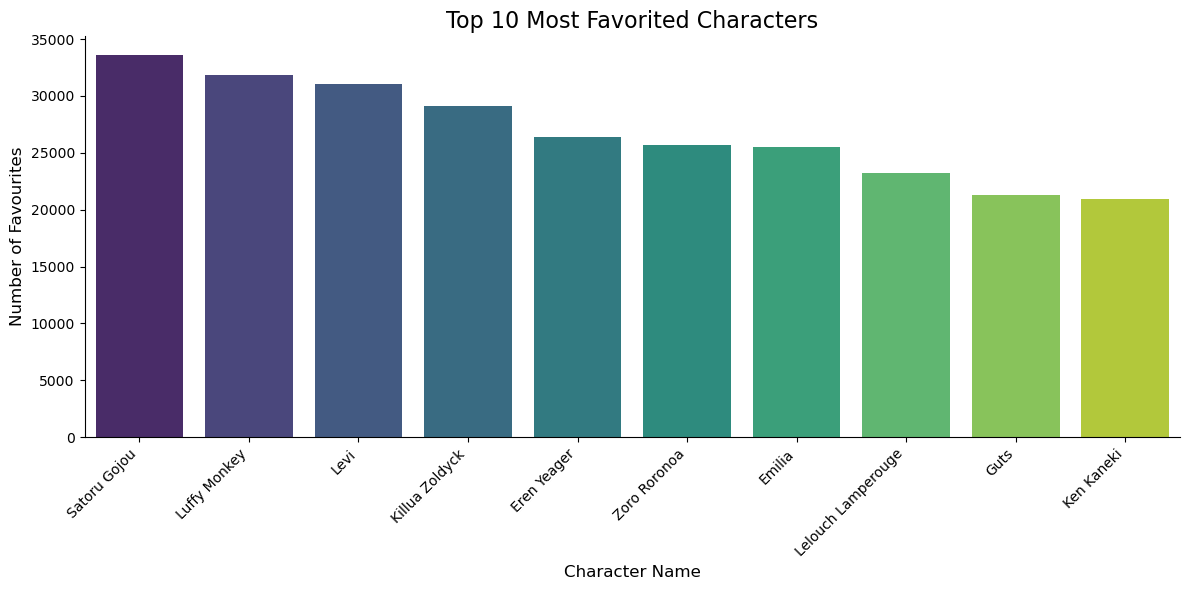

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("anilist_top_characters.csv")

# Sort the DataFrame by 'Favourites' in descending order
df_sorted = df.sort_values(by='Favourites', ascending=False)

# Select the top 10 characters
top_10_characters = df_sorted.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.barplot(x='Name', y='Favourites', data=top_10_characters, palette='viridis')  # Use a visually appealing palette
plt.title('Top 10 Most Favorited Characters', fontsize=16)  # Add a title with a larger font size
plt.xlabel('Character Name', fontsize=12)  # Label the x-axis
plt.ylabel('Number of Favourites', fontsize=12)  # Label the y-axis
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability and adjust font size
plt.yticks(fontsize=10)  # Adjust font size of y-axis ticks
sns.despine()  # Remove spines (top and right borders) for a cleaner look
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


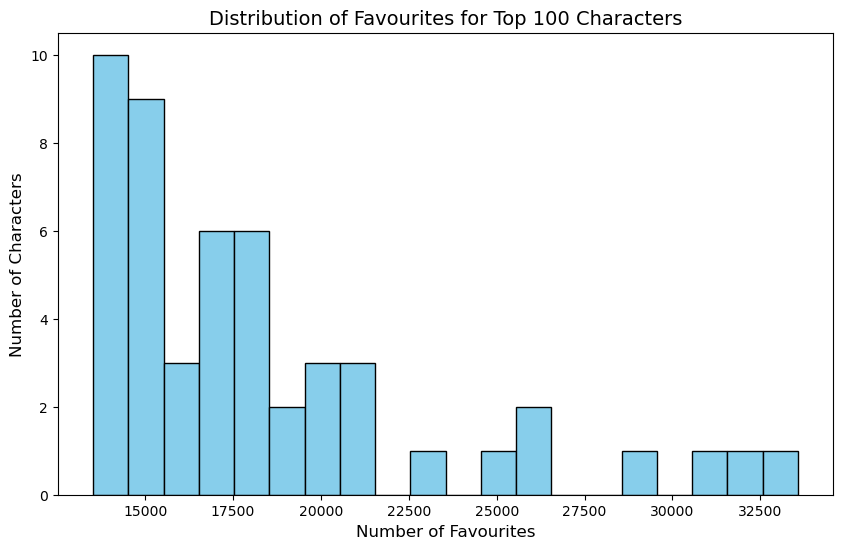

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("anilist_top_characters.csv")

# Convert the 'Favourites' column to numeric values
df['Favourites'] = pd.to_numeric(df['Favourites'], errors='coerce')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Favourites'], bins=20, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Favourites for Top 100 Characters', fontsize=14)
plt.xlabel('Number of Favourites', fontsize=12)
plt.ylabel('Number of Characters', fontsize=12)

# Show the plot
plt.show()

In [ ]:
import seaborn as sns

# Pivot the data to create a matrix of characters vs anime
heatmap_data = df_exploded.groupby(['Name', 'Anime'])['Favourites'].sum().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Heatmap of Character Favourites Across Different Anime', fontsize=14)
plt.xlabel('Anime', fontsize=12)
plt.ylabel('Character', fontsize=12)
plt.show()

NameError: name 'df_exploded' is not defined

<Figure size 1200x600 with 0 Axes>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65374 (\N{FULLWIDTH TILDE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


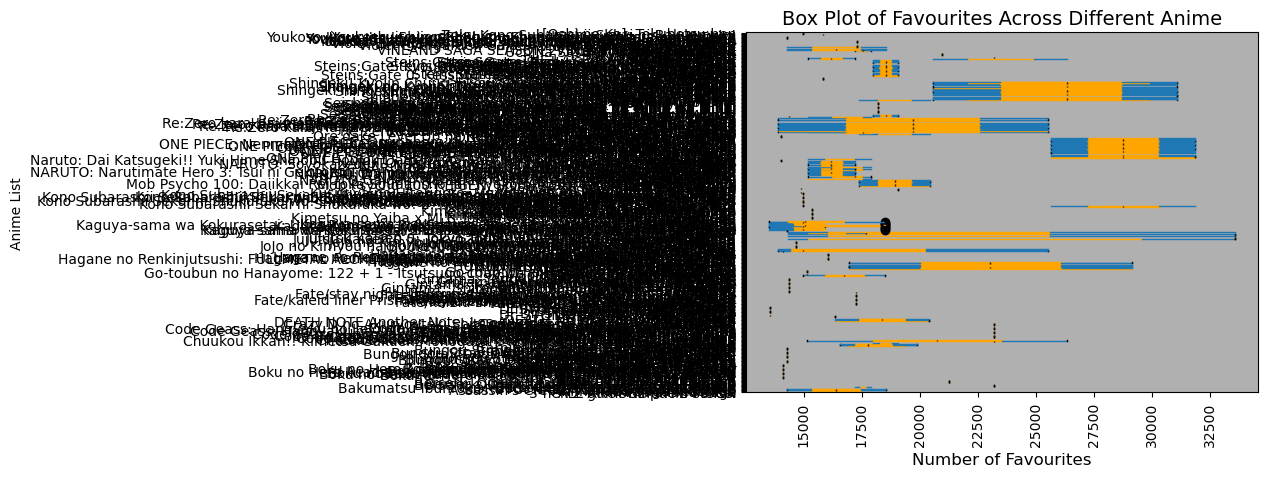

In [ ]:
# Explode the Anime column to have one row per anime
df['Anime List'] = df['Anime'].apply(lambda x: x.split(', '))
df_exploded = df.explode('Anime List')

# Box Plot for Favourites Across Different Anime
plt.figure(figsize=(12, 6))
df_exploded.boxplot(by='Anime List', column='Favourites', vert=False, patch_artist=True, 
                    medianprops={'color': 'black'}, boxprops={'color': 'orange'})
plt.xlabel('Number of Favourites', fontsize=12)
plt.title('Box Plot of Favourites Across Different Anime', fontsize=14)
plt.suptitle('')  # Remove default subtitle
plt.xticks(rotation=90)
plt.show()

/var/folders/p8/cqkznnfs2qqb22r0vjgs9sm80000gn/T/ipykernel_1118/2429398828.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Favourites', y='Anime List', data=df_exploded,
/var/folders/p8/cqkznnfs2qqb22r0vjgs9sm80000gn/T/ipykernel_1118/2429398828.py:26: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
/var/folders/p8/cqkznnfs2qqb22r0vjgs9sm80000gn/T/ipykernel_1118/2429398828.py:26: UserWarning: Glyph 9734 (\N{WHITE STAR}) missing from font(s) Arial.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
/var/folders/p8/cqkznnfs2qqb22r0vjgs9sm80000gn/T/ipykernel_1118/2429398828.py:26: UserWarning: Glyph 65374 (\N{FULLWIDTH TILDE}) missing from font(s) Arial.
  plt.tight_layout()  # Adjust layout to prevent labels from overl

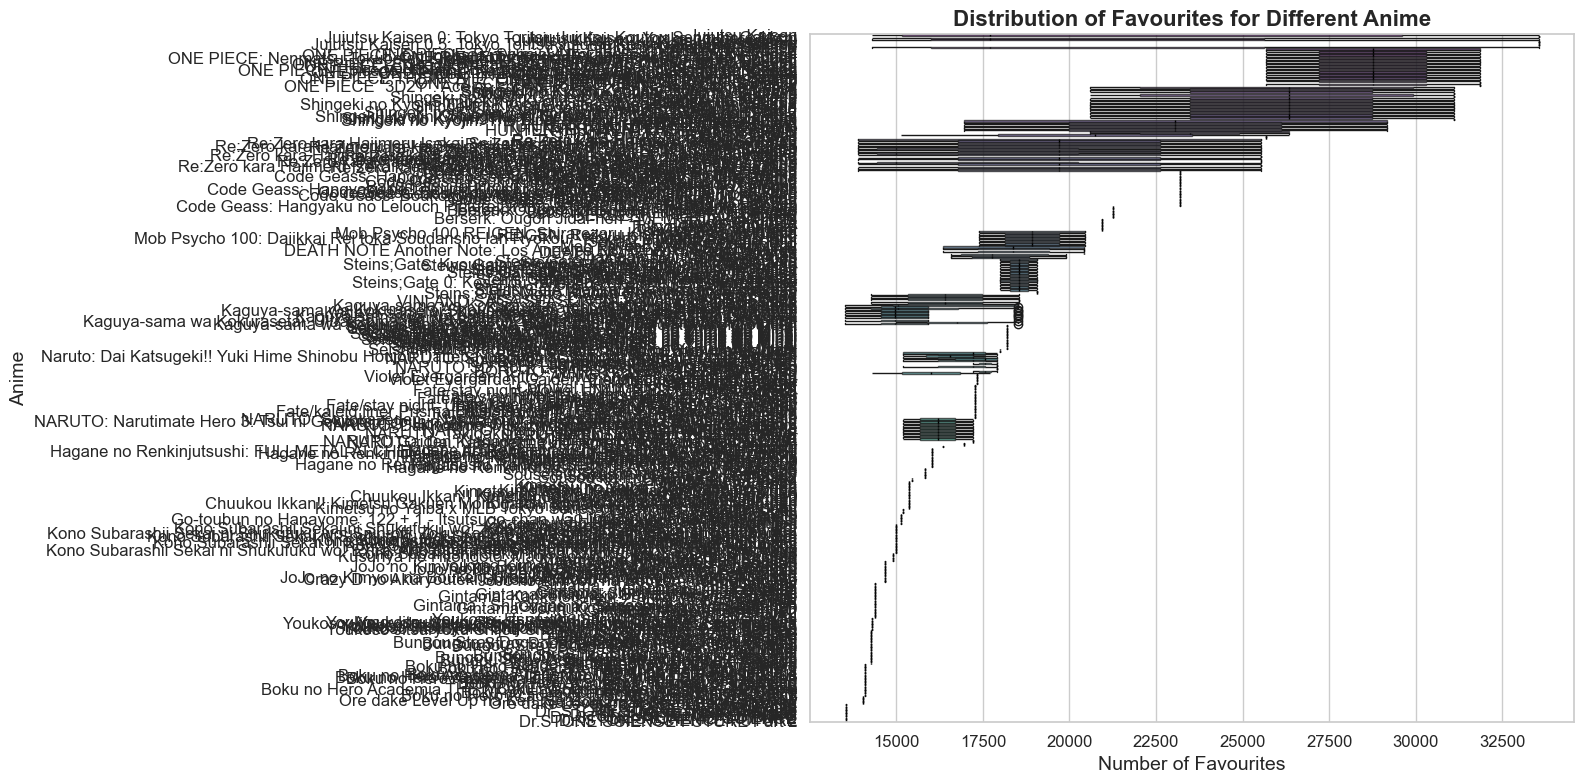

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Using seaborn for potentially better aesthetics

# Assuming your DataFrame is named 'df'
# Explode the Anime column to have one row per anime
df['Anime List'] = df['Anime'].apply(lambda x: x.split(', '))
df_exploded = df.explode('Anime List')

# Set a more visually appealing style using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))  # Increased figure size for better readability

# Create the box plot using seaborn for enhanced aesthetics and flexibility
sns.boxplot(x='Favourites', y='Anime List', data=df_exploded,
            palette='viridis',  # Choose a visually appealing color palette
            medianprops={'color': 'black'},
            boxprops={'alpha': 0.7})  # Add some transparency to the boxes

# Customize the plot for better clarity and information
plt.xlabel('Number of Favourites', fontsize=14)
plt.ylabel('Anime', fontsize=14)
plt.title('Distribution of Favourites for Different Anime', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()